In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Analyse de Données

### On importe les données 

In [2]:
allData = pd.read_csv("atlas-higgs-challenge-2014-v2.csv")

In [3]:
allData.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label,KaggleSet,KaggleWeight
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2.150,0.444,46.062,1.24,-2.475,113.497,0.000814,s,t,0.002653
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,0.725,1.158,-999.000,-999.00,-999.000,46.226,0.681042,b,t,2.233584
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,2.053,-2.028,-999.000,-999.00,-999.000,44.251,0.715742,b,t,2.347389
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,1.660654,b,t,5.446378
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.904263,b,t,6.245333


### On fait les traitements basiques des données pour avoir les premières statistiques.

In [4]:
# Nombres de 999 par features
# min, max, moyenne, variance toussa (en faisant attention aux 999)
# 

# On remplace 999 par NaN
allDataModified = allData.replace(-999,np.NaN)
# On rend la variable de decision Label en int 0 et 1
allDataModified["Label"] = allDataModified["Label"].apply(lambda x: 1 if x == "s" else 0)
# On enlève les columns dont on ne va pas se servir
allDataModified = allDataModified.drop(columns = ["KaggleSet","KaggleWeight","Weight"])
allDataModified.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,1
1,100001,160.937,68.768,103.235,48.146,NaN,NaN,NaN,3.473,2.078,...,164.546,1,46.226,0.725,1.158,NaN,NaN,NaN,46.226,0
2,100002,NaN,162.172,125.953,35.635,NaN,NaN,NaN,3.148,9.336,...,260.414,1,44.251,2.053,-2.028,NaN,NaN,NaN,44.251,0
3,100003,143.905,81.417,80.943,0.414,NaN,NaN,NaN,3.310,0.414,...,86.062,0,NaN,NaN,NaN,NaN,NaN,NaN,-0.000,0
4,100004,175.864,16.915,134.805,16.405,NaN,NaN,NaN,3.891,16.405,...,53.131,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0


In [5]:
description = allDataModified.describe()
description

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Label
count,818238.000000,693636.000000,818238.000000,818238.000000,818238.000000,237985.000000,237985.000000,237985.000000,818238.000000,818238.000000,...,818238.000000,818238.000000,490867.000000,490867.000000,490867.000000,237985.000000,237985.000000,237985.000000,818238.000000,818238.000000
mean,509118.500000,121.867697,49.252714,81.140561,57.849524,2.404626,372.181050,-0.828740,2.373871,18.969617,...,209.908730,0.979923,84.904285,-0.001248,-0.018856,57.810286,-0.006669,-0.010470,73.205594,0.341661
std,236205.109118,56.942487,35.378609,40.582708,63.411938,1.742546,398.235393,3.583769,0.780875,21.918491,...,126.816686,0.978793,60.649530,1.779419,1.815363,32.455466,2.031695,1.816033,98.331754,0.474267
min,100000.000000,9.044000,0.000000,6.329000,0.000000,0.000000,13.602000,-19.012000,0.208000,0.000000,...,13.678000,0.000000,30.000000,-4.500000,-3.142000,30.000000,-4.500000,-3.142000,0.000000,0.000000
25%,304559.250000,91.862000,19.304000,59.414000,14.164250,0.886000,112.628000,-2.626000,1.814000,2.839000,...,122.985000,0.000000,44.488000,-1.337000,-1.591000,37.325000,-1.604000,-1.589000,0.000000,0.000000
50%,509118.500000,112.501000,46.484000,73.744000,38.470000,2.101000,226.193000,-0.244000,2.492000,12.383000,...,179.883000,1.000000,65.760000,0.000000,-0.044000,47.993000,-0.011000,-0.020000,40.506000,0.000000
75%,713677.750000,135.576000,73.620000,92.188000,79.226750,3.691000,478.782000,0.945000,2.962000,27.634000,...,263.828000,2.000000,103.569500,1.336000,1.557000,66.695000,1.593000,1.568000,110.387000,1.000000
max,918237.000000,1949.261000,968.669000,1349.351000,2834.999000,8.724000,4974.979000,17.650000,5.751000,2834.999000,...,2190.275000,3.000000,1163.439000,4.500000,3.142000,817.801000,4.500000,3.142000,1860.175000,1.000000


In [6]:
# Repartition des classes
classCounts = allDataModified['Label'].value_counts()
sumClass = classCounts[0] + classCounts[1]
bClassPercent = classCounts[0] / sumClass
sClassPercent = classCounts[1] / sumClass

In [7]:
print(bClassPercent)
print(sClassPercent)

0.6583390162764379
0.3416609837235621


/Users/Nathan/anaconda3/envs/myenv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


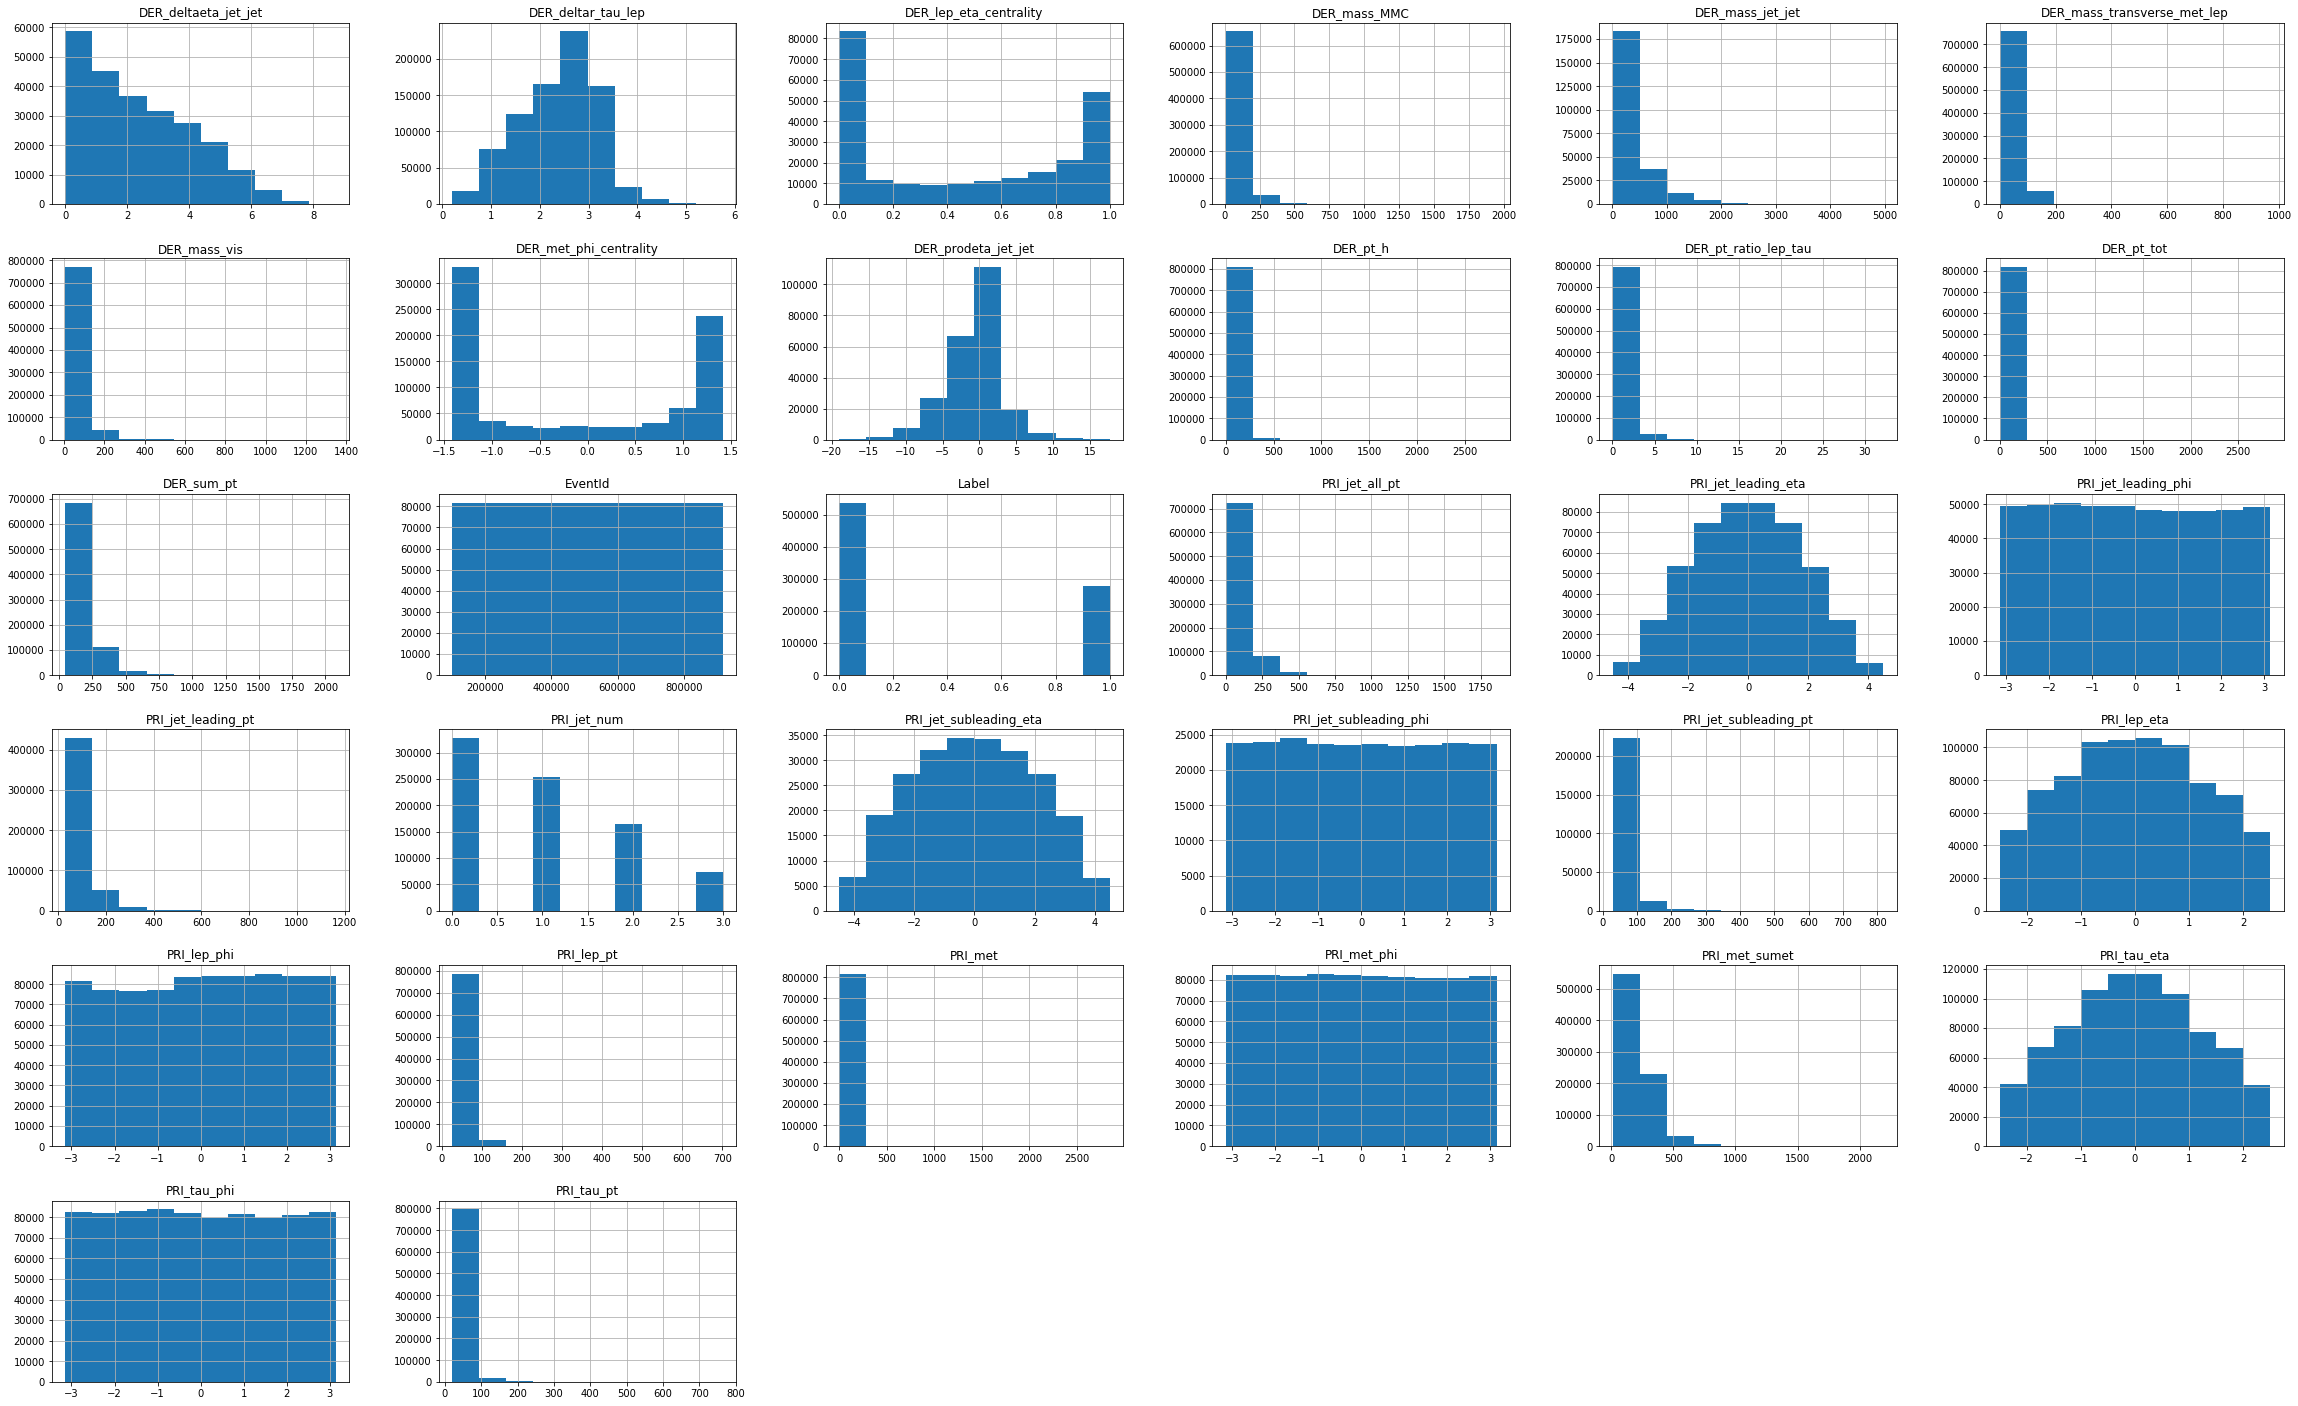

In [8]:
fig, ax = plt.subplots(figsize=(40,25))
#fig
allDataModified.hist(ax=ax)
fig.savefig('plots/hists.png')

### On regarde les boxplots

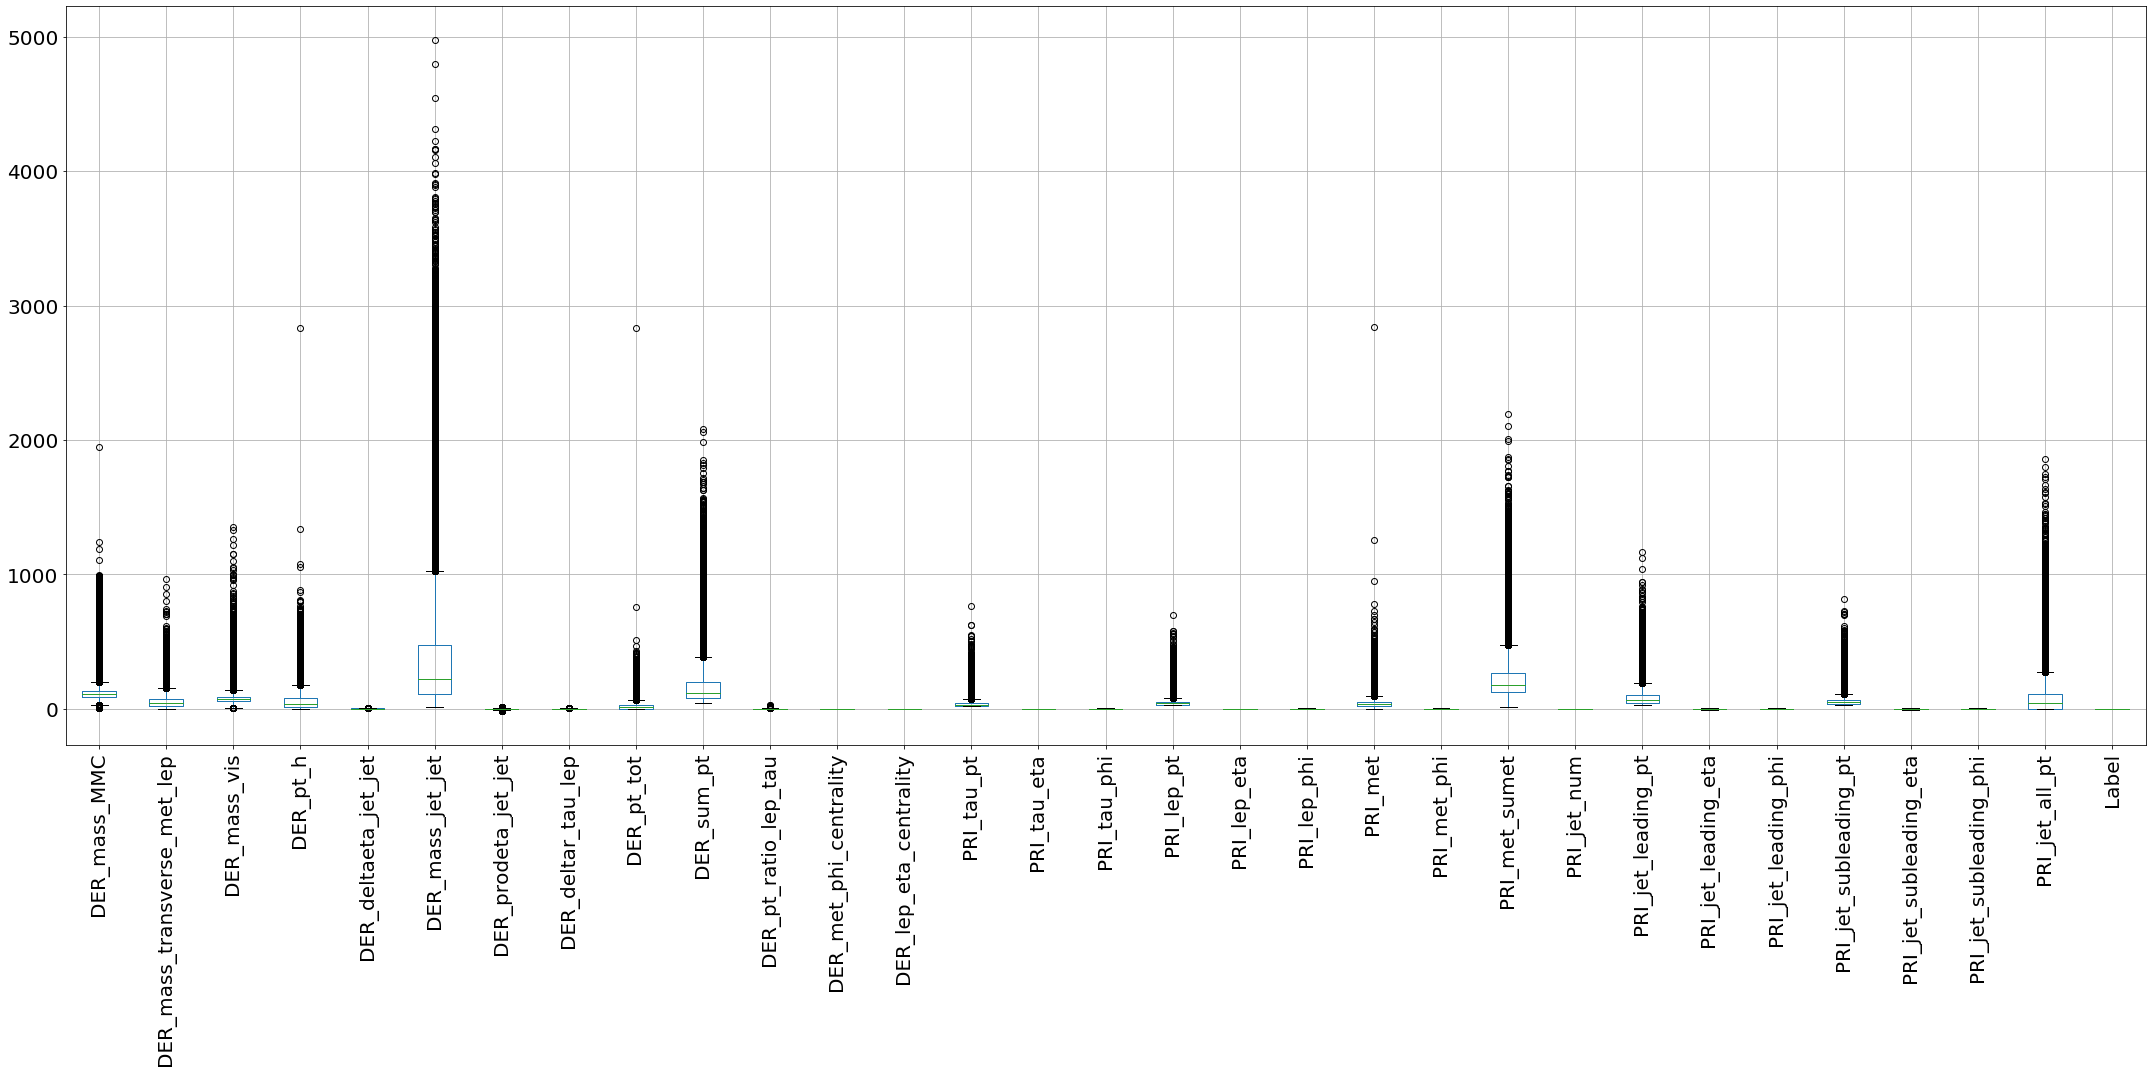

In [31]:
# Get the boxplots
#fig, ax = plt.subplots(figsize=(40,25))
fig, ax = plt.subplots(figsize=(30,15))

myCol = list(allDataModified.columns)
myCol.remove("EventId")
allDataModified.boxplot(myCol,rot=90,ax=ax)
ax.tick_params(axis='both', which='major', labelsize=20)
fig.tight_layout()
fig.savefig('plots/boxplots.png')

### On regarde la matrice de correlation

In [33]:
# analyse de la correlation entre chaque colonne et label.
# Voir si deux variables sont colinéaires
correlations = allDataModified.corr('pearson')
#plt.matshow(correlations)

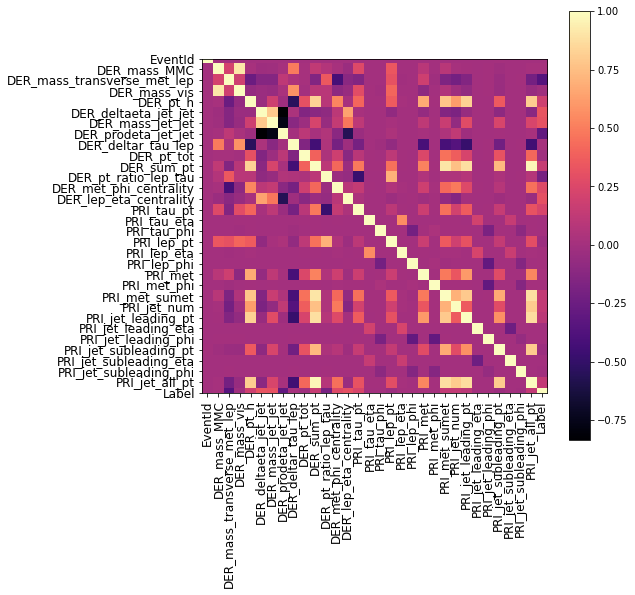

In [34]:
#fig = plt.figure()
#ax = fig.add_subplot(111)
#cax = ax.matshow(correlations)#, interpolation='nearest')
#fig.colorbar(cax)

#ax.set_xticklabels(correlations.columns,rotation=45)
#ax.set_yticklabels(correlations.columns)
#plt.show()


def affichage(A,filename):
    plt.figure(figsize=(9,9))
    plt.tick_params(axis='both', labelsize=12)
    plt.imshow(A, interpolation='nearest',cmap="magma")
    localLabs = correlations.columns
    plt.yticks(range(len(localLabs)),localLabs) # affichage sur l'image
    plt.xticks(range(len(localLabs)),localLabs, rotation=90)
    plt.tight_layout()
    plt.colorbar()
    if filename != None:
        plt.savefig(filename)
        
affichage(correlations.to_numpy(),"plots/correlMat.jpeg")

In [35]:
correlations

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Label
EventId,1.000000,0.000072,-0.001421,-0.000932,-0.000671,0.000606,0.001574,-0.001321,0.000726,0.001263,...,0.000282,0.000381,0.000498,0.001845,-0.002324,0.002893,0.000421,-0.003346,0.000767,-0.000899
DER_mass_MMC,0.000072,1.000000,0.223175,0.912700,0.021898,-0.023764,-0.017082,0.014138,0.495157,0.013397,...,0.091502,0.014967,0.005501,0.000162,0.004480,-0.011647,-0.000358,-0.000601,0.011508,0.013158
DER_mass_transverse_met_lep,-0.001421,0.223175,1.000000,0.190212,-0.251333,-0.132866,-0.129860,0.122417,0.040346,0.013515,...,-0.166788,-0.211657,-0.145927,-0.000117,0.004804,-0.035888,-0.000758,0.005128,-0.210511,-0.350689
DER_mass_vis,-0.000932,0.912700,0.190212,1.000000,-0.062266,-0.036423,-0.051957,0.029720,0.577233,-0.001239,...,0.056359,-0.025115,-0.075900,-0.000407,0.004029,-0.046151,-0.003068,0.000217,-0.051010,-0.012586
DER_pt_h,-0.000671,0.021898,-0.251333,-0.062266,1.000000,-0.042325,0.183616,-0.021662,-0.542161,0.304827,...,0.783675,0.623482,0.825054,0.002420,-0.000526,0.354818,0.000389,-0.003050,0.808338,0.194852
DER_deltaeta_jet_jet,0.000606,-0.023764,-0.132866,-0.036423,-0.042325,1.000000,0.796891,-0.836536,0.034955,-0.144931,...,-0.146799,-0.175972,-0.048295,0.000505,-0.001058,-0.091972,-0.002477,0.001202,-0.112765,0.326042
DER_mass_jet_jet,0.001574,-0.017082,-0.129860,-0.051957,0.183616,0.796891,1.000000,-0.764041,-0.114237,-0.032604,...,0.160991,-0.075475,0.281517,-0.001208,0.000133,0.236295,-0.001193,0.002446,0.238314,0.314173
DER_prodeta_jet_jet,-0.001321,0.014138,0.122417,0.029720,-0.021662,-0.836536,-0.764041,1.000000,0.005266,0.108138,...,0.052799,0.126085,-0.022698,-0.001510,-0.000681,0.005248,0.000576,0.000786,0.022030,-0.293096
DER_deltar_tau_lep,0.000726,0.495157,0.040346,0.577233,-0.542161,0.034955,-0.114237,0.005266,1.000000,-0.154959,...,-0.406602,-0.348742,-0.482956,-0.002131,0.006911,-0.226603,-0.001421,0.003605,-0.448114,0.011065
DER_pt_tot,0.001263,0.013397,0.013515,-0.001239,0.304827,-0.144931,-0.032604,0.108138,-0.154959,1.000000,...,0.461238,0.369933,0.227764,-0.001553,0.003321,0.320960,-0.000908,-0.000140,0.415369,-0.013723


### Heatmap

In [36]:
allDataModifiedSn = allDataModified
allDataModifiedSn["PRI_jet_num"] = allDataModifiedSn["PRI_jet_num"].replace([0,1],np.NaN)
allDataModifiedSn.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,258.733,2.0,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,1
1,100001,160.937,68.768,103.235,48.146,NaN,NaN,NaN,3.473,2.078,...,164.546,NaN,46.226,0.725,1.158,NaN,NaN,NaN,46.226,0
2,100002,NaN,162.172,125.953,35.635,NaN,NaN,NaN,3.148,9.336,...,260.414,NaN,44.251,2.053,-2.028,NaN,NaN,NaN,44.251,0
3,100003,143.905,81.417,80.943,0.414,NaN,NaN,NaN,3.310,0.414,...,86.062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000,0
4,100004,175.864,16.915,134.805,16.405,NaN,NaN,NaN,3.891,16.405,...,53.131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0


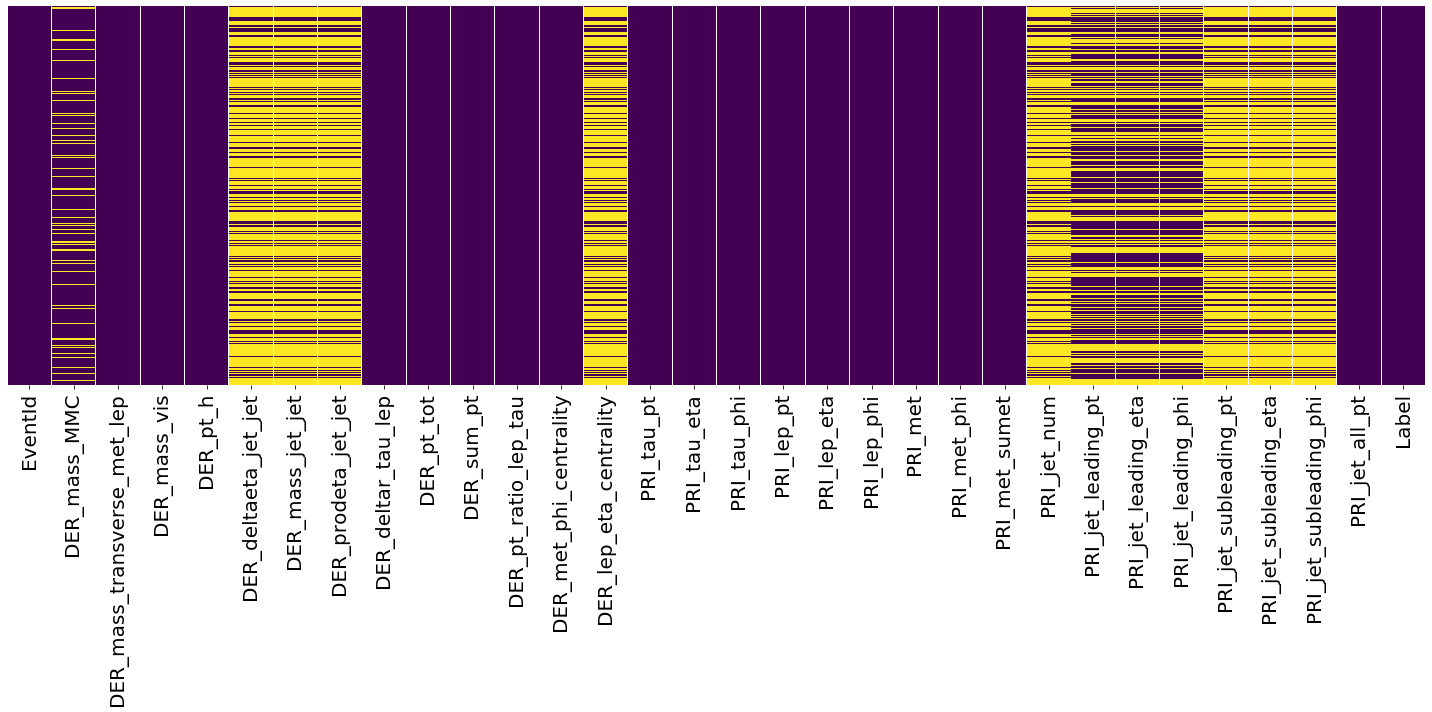

In [39]:
fig, ax = plt.subplots(figsize=(20,10))
sns_plot=sns.heatmap(allDataModifiedSn.isnull(), cbar=False, yticklabels=False, cmap='viridis', ax=ax)
ax.tick_params(axis='both', which='major', labelsize=20)
fig.tight_layout()
fig.savefig("plots/Null_Values_HeatMap.png")

Correlation 1 entre le nombre de jets et les valeurs manquante. Prendre des décisions en conséquences (potentiellemnt plusieurs modèles d'apprentissage)

### On traite les données manquantes

C'est peut-être pas la meilleur dée du monde parce que on veut que notre modèle soit résistant à ces problèmes dans la phase de test. On a beaucoup de chances de se retrouver confronter à des cas comme ça et il faut pouvoir les gérer.

# Classification

### On crée une baseline